## GRUPO 11
*   Agustin Sumay agustinsumay05@gmail.com
*   Luca Caunedo luca.caunedo@gmail.com
*   Lucas Gervasi gervasilucas22@gmail.com




*   Elemento de lista
*   Elemento de lista


<h1 style="fontsize=10px"> ¿Podemos predecir la probabilidad de que un tiro termine en gol? </h1>

<div style="font-size: 90%"

Predicción de goles esperados en fútbol con aprendizaje automático
<div style="font-size: 90%"

Enlace al conjunto de datos original de la librería statsbombpy: https://drive.google.com/file/d/1zrQolP8VOEZ45WLemCRJ8EgNlVJzURDB/view?usp=sharing
<div style="font-size: 90%"

Enlace al conjunto de datos sobre la información de Jugadores: https://drive.google.com/file/d/1-fVGsGtFALPybNzVKOzuMA71vIMNWmTq/view?usp=sharing
<div style="font-size: 90%"

Enlace al conjunto de datos alterado: https://drive.google.com/file/d/167zPIYYKX5bLz6FHPCX7hsloIqlcwiSO/view?usp=sharing

---


<br>




<div style="font-size: 90%"

**2. Describir brevemente el conjunto de datos, incluyendo su origen. Tengan en
cuenta que esto no solamente refiere al link donde obtuvieron el conjunto de
datos sino que, tal vez, tengan que investigar cómo se obtuvo o dónde se
generó**

<div style="font-size: 90%"

El conjunto de datos utilizado proviene de la StatsBomb Open Data, una base de datos pública de eventos futbolísticos proporcionada por la empresa StatsBomb, especializada en análisis deportivo. Estos datos incluyen información detallada sobre partidos, equipos, jugadores y eventos (como pases, tiros, recuperaciones, etc.).

<div style="font-size: 90%"

El acceso se realiza a través de la API pública mediante la librería statsbombpy, que permite descargar partidos de competiciones como el Mundial, la Champions League, la Liga Española y otros torneos.

<div style="font-size: 90%"

Para este trabajo en particular, se filtraron los eventos de tipo "Shot", correspondientes a todos los intentos de disparo registrados durante los partidos. Estos eventos incluyen información como la posición del disparo, el resultado (gol o no), la parte del cuerpo utilizada, la posición del arquero,entre otras características.

<div style="font-size: 90%"

https://statsbomb.com/es/articulos/futbol/introduccion-al-uso-de-statsbomb-data-con-python/

<div style="font-size: 90%"

Además, para complementar la información y enriquecer el análisis, se utilizó un segundo conjunto de datos disponible públicamente en internet, el cual combina información de Wyscout , Transfermarkt y StatsBomb:

<div style="font-size: 90%"

https://figshare.com/articles/dataset/Multidimensional_match_performance_dataset_-_Wyscout_Transfermarkt/25671933

<div style="font-size: 90%"

Este dataset incluye, entre otras variables, el pie hábil de cada jugador, dato que no se encuentra directamente disponible en StatsBomb Open Data. Para vincular ambos conjuntos de datos, se utilizó el identificador único (player_id) que comparte la información de los jugadores en ambas fuentes.

<br>
<br>
</div>



<div style="font-size: 90%"

**3. Explorar el conjunto de datos:**

<br>
<div style="font-size: 90%"

**a.  ¿Cuántas filas y columnas tiene?**

<div style="font-size: 90%"

Tiene 18179 filas y 118 columnas.  
<br>

<div style="font-size: 90%"

**b. ¿Hay valores faltantes en algunas columnas?**

<div style="font-size: 90%"

Sí, el conjunto de datos presenta valores faltantes en varias columnas.
Cuando obtuvimos los datos de la libreria filtramos por type="Shot" y nos quedaron las columnas de los demás tipos de eventos como faltantes. En otros casos, los datos faltantes se deben a que ciertas variables solo aplican en situaciones específicas. Por ejemplo, la variable shot_aerial_won indica si el disparo fue ganado en el aire. Cuando el tiro no fue aéreo, el valor aparece como faltante (NaN), lo cual no implica un error, sino que simplemente no aplica.

<div style="font-size: 90%"

Para facilitar el procesamiento, estos valores faltantes los transformamos a False, asumiendo que si no hay información sobre un disparo aéreo, entonces no fue un disparo de ese tipo.

<div style="font-size: 90%"

Además, al incorporar el pie hábil del jugador desde un segundo dataset externo, también se identificaron valores faltantes. No se logró obtener esta información para 4.558 registros (aproximadamente el 25% del total).

<div style="font-size: 90%"

Estos valores faltantes pueden deberse a que algunos jugadores no tenían datos disponibles en la fuente secundaria, o a diferencias en el mapeo de identificadores entre datasets.

<br>

<div style="font-size: 90%"

**c. Analizar los tipos de datos presentes. Esto puede ser por columna o, si**
**fueran demasiadas, cuántas son numéricas, cuántas categóricas, etc.**

<div style="font-size: 90%"

Contiene 89 columnas numéricas y 29 columnas categóricas


<br>
</div>

<div style="font-size: 90%"

**4. Exponer el problema o pregunta a resolver. Tiene que quedar claro cuál es el target, si se trata de un problema de clasificación o regresión, y con qué métrica ó métricas esperan evaluar el modelo.**

<div style="font-size: 90%"

El objetivo de este trabajo es construir un modelo que estime la probabilidad de que un disparo termine en gol, en función de diversas características del tiro (posición, parte del cuerpo utilizada, pie habil del jugador, entre otros).

<div style="font-size: 90%"

Se trata de un problema de clasificación, ya que se busca predecir un valor continuo entre 0 y 1 que represente la probabilidad de gol.

<div style="font-size: 90%"

El target del modelo es una variable binaria que indica si el tiro fue gol (1) o no (0). Aunque el modelo predice una probabilidad (regresión), se entrena con esta variable como referencia.


<br>
<br>
<br>
<br>
<br>
<br>
<br>

</div>




<div style="font-size: 90%"


**5. Dado el target propuesto, elegir dos atributos (sólo dos) que crean que tengan un buen poder predictivo con respecto a ese target. Explicar por qué creen que es el caso y proveer uno o dos gráficos (no más) que muestren si es o no así. (No se preocupen si aún no da como esperan).**

<div style="font-size: 90%"

* Distancia al arco: Cuanto más cerca está el jugador del arco, mayor es la probabilidad de convertir un gol. Es una relación bastante intuitiva y se refleja bien en los datos.

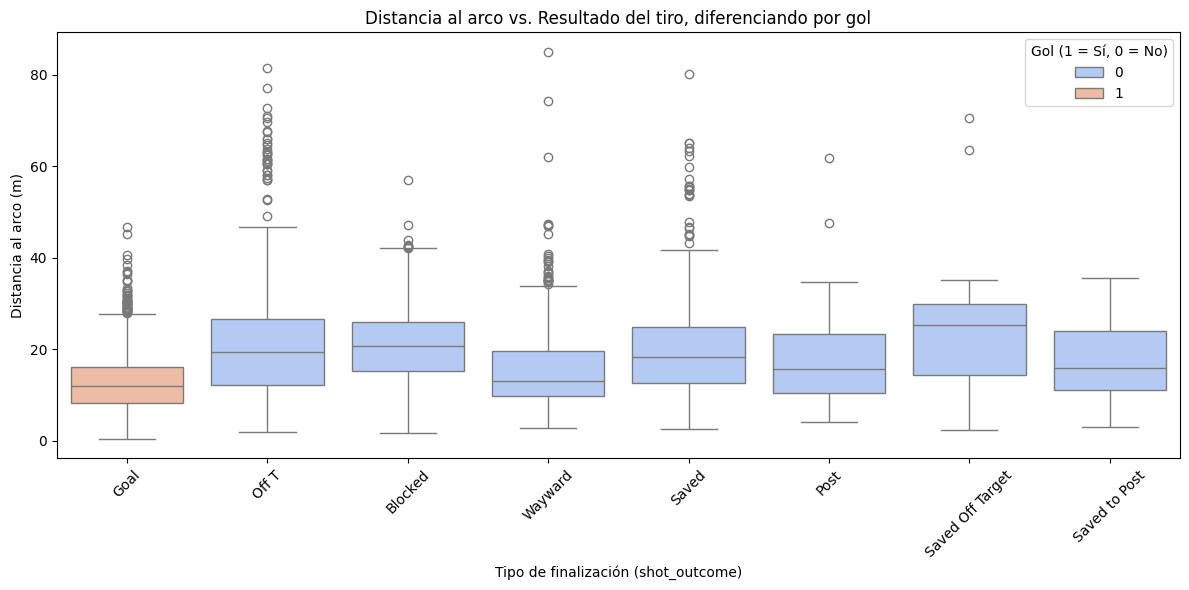

<div style="font-size: 90%"

Al observar el gráfico, se destaca que los disparos que terminan en gol suelen realizarse desde distancias significativamente más cercanas al arco en comparación con otros tipos de finalización. La mediana de la distancia para los goles se encuentra alrededor de los 12 metros, y la mayoría de estos tiros se concentran en un rango relativamente estrecho y cercano al arco. Además, hay pocos outliers con distancias elevadas, lo que refuerza la idea de que es poco común anotar desde muy lejos. Esto confirma que la distancia al arco es un factor clave a la hora de predecir la probabilidad de convertir un gol.


<div style="font-size: 90%"


* Ángulo del disparo: No solo importa la distancia, sino también el ángulo desde donde se dispara. Un tiro desde el centro tiene más chances que uno desde un costado, incluso si están a la misma distancia.

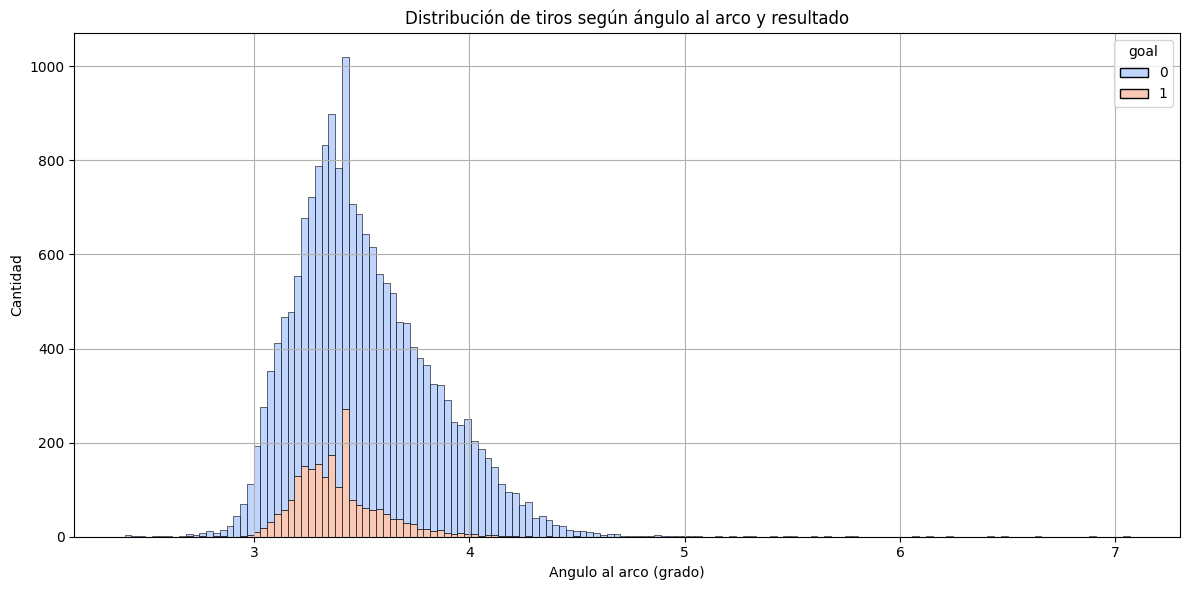

<div style="font-size: 90%"

La mayoría de los tiros se concentran entre los 3 y 4 grados. Desde el punto penal, el ángulo visual al arco es de aproximadamente 37 grados, entonces podemos confirmar mediante el grafico que la variable Angulo tiene un buen poder predictivo con respecto al target. Cuanto mejor es el ángulo, mayor es la eficacia del disparo.
<div style="font-size: 90%"

</div>